In [11]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.metrics import classification_report
import random

In [2]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,83678.0,-0.912855,2.260158,-0.782765,1.184087,-0.587891,0.140598,-2.187267,-7.666545,-0.282820,...,3.439930,-0.773055,0.871249,0.633619,0.267623,-0.320357,0.348506,0.327753,0.89,0
1,172189.0,-1.421497,-0.904442,0.517444,-0.214573,0.332934,-0.335225,1.210516,-0.000920,0.021592,...,0.068763,-0.472301,0.477771,-0.757650,1.037298,0.416332,-0.045102,-0.035172,319.90,0
2,144266.0,1.848900,-0.589884,-1.166357,0.321976,-0.376312,-0.961120,0.142027,-0.273200,1.151755,...,-0.116431,-0.329448,0.109448,-0.101197,-0.096963,-0.091498,-0.047036,-0.039822,110.12,0
3,145193.0,1.852921,-0.284156,-0.416794,1.417951,-0.220435,0.232379,-0.316730,0.146740,0.928472,...,-0.471313,-1.142512,0.367383,-0.477458,-0.328485,-1.102301,0.048923,-0.039378,34.90,0
4,83094.0,1.116980,-0.580124,0.854910,-0.922402,-0.870772,0.447938,-0.924876,0.436790,1.706103,...,0.235704,0.955489,-0.074131,-0.258075,0.421365,-0.486822,0.119259,0.014301,1.00,0


In [3]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

492
284315


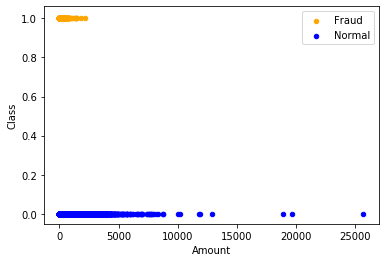

In [4]:
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

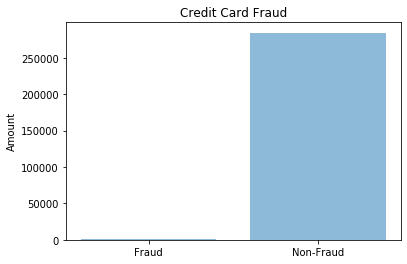

In [6]:
objects = ('Fraud', 'Non-Fraud')
y_pos = np.arange(len(objects))
amounts = [len(fraud), len(non_frauds)]
plt.bar(y_pos, amounts, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Amount')
plt.title('Credit Card Fraud')

plt.show()

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [8]:
x = df.iloc[:, :-1] 
y = df['Class'] 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

In [9]:
logistic = linear_model.LogisticRegression(C=1e5) 
logistic.fit(X_train,y_train)
print('Score:', logistic.score(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9987259612973125


In [10]:
y_predicted = np.array(logistic.predict(X_test))
print(y_predicted)

[0 0 0 ... 0 0 0]


In [13]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99507
           1       0.68      0.53      0.60       176

    accuracy                           1.00     99683
   macro avg       0.84      0.77      0.80     99683
weighted avg       1.00      1.00      1.00     99683

